# Malignant Comments Classifier Project

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import itertools
import string
from stop_words import get_stop_words
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(159571, 8)

In [4]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [5]:
df.tail()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [7]:
# Dataset Contains 159571 Entries which consist of 8 column

In [109]:
# As this is a heavy dataset which is giving system out of memory in my pc. So, i am using reindex to shuffle train.csv for further splitting dataset.

In [9]:
df = df.reindex(np.random.permutation(df.index))

In [10]:
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
119840,80e2b2525cffbc25,Editing without agreement from established boa...,0,0,0,0,0,0
102569,24f02455ae8cde19,Completely agree. The List of Prime Ministers ...,0,0,0,0,0,0
26049,44fd854111ed465c,Thats a pretty naive statement. Just because t...,0,0,0,0,0,0
66886,b2f2fc2fd961d836,"Stop Editing \n\nyou stupid a-hole, stop edit...",1,0,1,0,1,0
106231,38563f09d0a4ec60,"Oh, well Harry finally got his payback on me. ...",1,0,0,0,0,0


# Separate Comment Field Data

In [12]:
comment = df['comment_text']

In [13]:
comment.head()

119840    Editing without agreement from established boa...
102569    Completely agree. The List of Prime Ministers ...
26049     Thats a pretty naive statement. Just because t...
66886     Stop Editing  \n\nyou stupid a-hole, stop edit...
106231    Oh, well Harry finally got his payback on me. ...
Name: comment_text, dtype: object

In [14]:
comment = comment.values

# Seperate Outcome Labels Data

In [16]:
label = df[['malignant', 'highly_malignant' , 'rude' , 'threat' , 'abuse' , 'loathe']]

In [17]:
label.head()

,malignant,highly_malignant,rude,threat,abuse,loathe
119840,0,0,0,0,0,0
102569,0,0,0,0,0,0
26049,0,0,0,0,0,0
66886,1,0,1,0,1,0
106231,1,0,0,0,0,0


In [18]:
label = label.values

# Frequency Occurance of Multi-labeled Outcome Data

In [108]:
a = 0 # Having atleast 1 Label
b = 0 # Having atleast 2 or More Label

In [21]:
for i in range(label.shape[0]):
    count = np.count_nonzero(label[i])
    if count :
        a = a+1
    if count > 1 :
        b = b+1

In [22]:
print(f"Having atleast 1 Label   : {a}")
print(f"Having atleast 2 or More : {b}")

Having atleast 1 Label   : 16225
Having atleast 2 or More : 9865


# Lets Visualize the Data : Comments Length

In [24]:
x = [len(comment[i]) for i in range(comment.shape[0])]

In [25]:
print(f"Avg. length of comments: {round(sum(x)/len(x), 2)}")

Avg. length of comments: 394.14


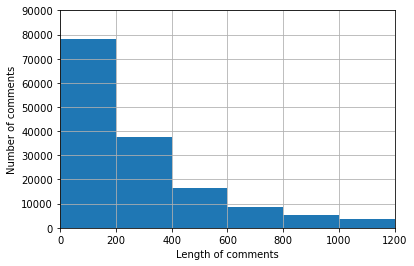

In [26]:
plt.hist(x, bins = [1, 200, 400, 600, 800, 1000, 1200])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments')       
plt.axis([0, 1200, 0, 90000])
plt.grid(True)
plt.show()

# Visualize Outcome Labels depending on Comments Length

In [28]:
y = np.zeros(label.shape)

In [29]:
for ix in range(comment.shape[0]):
    l = len(comment[ix])
    if label[ix][0] :
        y[ix][0] = l
    if label[ix][1] :
        y[ix][1] = l
    if label[ix][2] :
        y[ix][2] = l
    if label[ix][3] :
        y[ix][3] = l
    if label[ix][4] :
        y[ix][4] = l
    if label[ix][5] :
        y[ix][5] = l

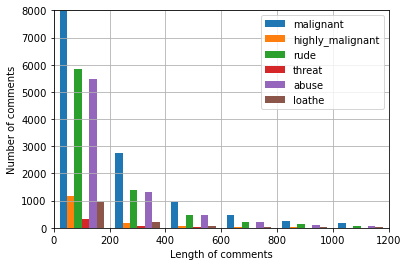

In [30]:
bins = [1, 200, 400, 600, 800, 1000, 1200]
outcome = ['malignant', 'highly_malignant' , 'rude' , 'threat' , 'abuse' , 'loathe'] 
plt.hist(y,bins = bins, label = outcome)
plt.axis([0, 1200, 0, 8000])
plt.xlabel('Length of comments')
plt.ylabel('Number of comments') 
plt.legend()
plt.grid(True)
plt.show()

In [107]:
# Remomving excessive comments lenth to avoid increase in training time and decrease in accuracy.
# So, average taking 100 length of comments.
# Suggestion : take 400 - 500 as Length of comments for better results.

In [32]:
comments = []

In [33]:
labels = []

In [34]:
for ix in range(comment.shape[0]):
    if len(comment[ix]) <= 100:
        comments.append(comment[ix])
        labels.append(label[ix])

In [35]:
labels = np.asarray(labels)

In [36]:
len(comments) # New Length of comments

42043

# Removing Punctuations and other special characters

In [38]:
punctuation_edit = string.punctuation.replace('\'','') +"0123456789"
outtab = "                                         "
trantab = str.maketrans(punctuation_edit, outtab)

# Removing Stop Words

In [40]:
stop_words = get_stop_words('english')
stop_words.append('')

for x in range(ord('b'), ord('z')+1):
    stop_words.append(chr(x))

# Stemming and Lemmatizing

In [42]:
lemmatiser = WordNetLemmatizer()
stemmer = PorterStemmer()

In [106]:
# First we have removed punctuation and special characters and the split words by space.
# Then applied stemmer and lemmatizer and recombined the words again.

In [44]:
for i in range(len(comments)):
    comments[i] = comments[i].lower().translate(trantab)
    l = []
    for word in comments[i].split():
        l.append(stemmer.stem(lemmatiser.lemmatize(word,pos="v")))
    comments[i] = " ".join(l)

In [45]:
count_vector = CountVectorizer(stop_words = stop_words)

In [46]:
tf = count_vector.fit_transform(comments).toarray()

C:\ProgramData\Anaconda3\envs\tf\lib\site-packages\sklearn\feature_extraction\text.py:386: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'can', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [47]:
tf.shape

(42043, 24492)

# Splitting dataset

We are splitting the (train.csv) dataset because it takes lot of time to compute

In [49]:
def shuffle(matrix, target, test_proportion):
    ratio = int(matrix.shape[0]/test_proportion)
    X_train = matrix[ratio:,:]
    X_test =  matrix[:ratio,:]
    Y_train = target[ratio:,:]
    Y_test =  target[:ratio,:]
    return X_train, X_test, Y_train, Y_test

In [50]:
X_train, X_test, Y_train, Y_test = shuffle(tf, labels,3)

In [51]:
print(X_train.shape)
print(X_test.shape)

(28029, 24492)
(14014, 24492)


# Models

In [53]:
from sklearn.metrics import hamming_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

In [61]:
def evaluate_score(Y_test,predict): 
    loss = hamming_loss(Y_test,predict)
    print(f"Hamming_loss : {round(loss*100, 2)}")
    accuracy = accuracy_score(Y_test,predict)
    print(f"Accuracy : {round(accuracy*100, 2)}")
    try : 
        loss = log_loss(Y_test,predict)
    except :
        loss = log_loss(Y_test,predict.toarray())
    print(f"Log_loss : {round(loss, 2)}")

# 1 Binary Relevance (BR) with MultinomialNB

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
clf = []
for ix in range(6):
    clf.append(MultinomialNB())
    clf[ix].fit(X_train,Y_train[:,ix])

In [58]:
predict = []
for ix in range(6):
    predict.append(clf[ix].predict(X_test))

predict = np.asarray(np.transpose(predict))

In [62]:
evaluate_score(Y_test,predict)

Hamming_loss : 4.27
Accuracy : 84.57
Log_loss : 3.04


# 2 Binary Relevance (BR) with SVM classifier

In [67]:
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC

In [68]:
classifier = BinaryRelevance(classifier = SVC(), require_dense = [False, True])

In [69]:
classifier.fit(X_train, Y_train)

BinaryRelevance(classifier=SVC(), require_dense=[False, True])

In [70]:
predictions = classifier.predict(X_test)

In [71]:
evaluate_score(Y_test,predictions)

Hamming_loss : 3.02
Accuracy : 87.57
Log_loss : 2.66


# 3 Binary Relevance (BR) with GausseanNB

In [77]:
from sklearn.naive_bayes import GaussianNB

In [78]:
clf = []
for ix in range(6):
    clf.append(GaussianNB())
    clf[ix].fit(X_train,Y_train[:,ix])

In [80]:
predict = []
for ix in range(6):
    predict.append(clf[ix].predict(X_test))

predict = np.asarray(np.transpose(predict))

In [81]:
evaluate_score(Y_test,predict)

Hamming_loss : 23.51
Accuracy : 46.2
Log_loss : 2.08


# 4 Classifier chain with MultinomialNB

In [82]:
from skmultilearn.problem_transform import ClassifierChain

In [83]:
classifier = ClassifierChain(MultinomialNB())

In [84]:
classifier.fit(X_train, Y_train)

ClassifierChain(classifier=MultinomialNB(), require_dense=[True, True])

In [85]:
predictions = classifier.predict(X_test)

In [86]:
evaluate_score(Y_test,predictions)

Hamming_loss : 4.52
Accuracy : 84.77
Log_loss : 2.33


# 5 Label Powerset with MultinomialNB

In [87]:
from skmultilearn.problem_transform import LabelPowerset

In [94]:
classifier = LabelPowerset(MultinomialNB())

In [95]:
classifier.fit(X_train, Y_train)

LabelPowerset(classifier=MultinomialNB(), require_dense=[True, True])

In [96]:
predictions = classifier.predict(X_test)

In [97]:
evaluate_score(Y_test,predictions)

Hamming_loss : 4.0
Accuracy : 85.47
Log_loss : 2.0


# Visualization of Models

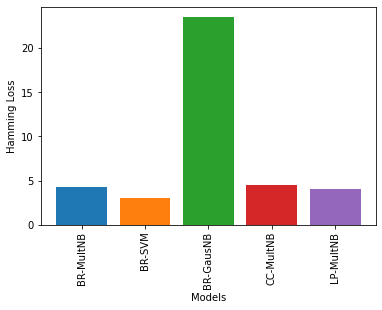

In [101]:
x = ['BR-MultNB','BR-SVM','BR-GausNB','CC-MultNB','LP-MultNB']
y = [4.27, 3.02, 23.51, 4.52, 4.0]
plt.ylabel('Hamming Loss')
plt.xlabel('Models')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i])
plt.show()

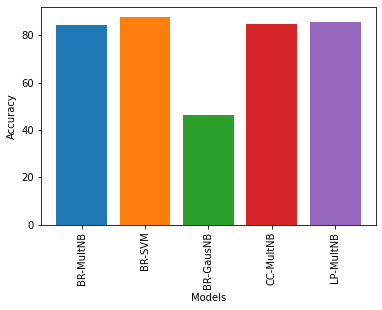

In [102]:
x = ['BR-MultNB','BR-SVM','BR-GausNB','CC-MultNB','LP-MultNB']
y = [84.57, 87.57, 46.20, 84.77, 85.47]
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i])
plt.show()

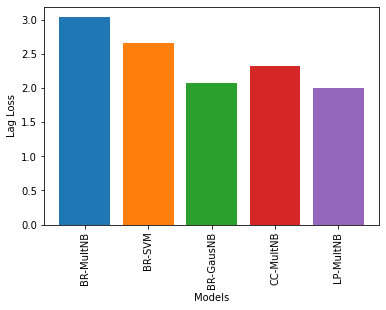

In [114]:
x = ['BR-MultNB','BR-SVM','BR-GausNB','CC-MultNB','LP-MultNB']
y = [3.04, 2.66, 2.08, 2.33, 2.0]
plt.ylabel('Lag Loss')
plt.xlabel('Models')
plt.xticks(rotation=90)
for i in range(len(y)):
    plt.bar(x[i], y[i])
plt.show()

The best models work on this dataset is Label Powerset with MultinomialNB which has a Hamming Loss of 4.0, Accuracy of 85.47, Lag Loss of 2.0 and Binary Relevance with SVM which has a Hamming Loss of 3.02, Accuracy of 87.57 and Lag Loss of 2.66